# Лабораторная работа 1. Выполнил Гришин Степан

# Нормальное несмещенное распределение

Подключаем библиотеки

In [1]:
import pandas as pd
from matplotlib.pyplot import plot
import seaborn as sns
import scipy

Загружаем данные

In [2]:
data = pd.read_csv('Desktop/customer_churn_data.csv')

In [3]:
data

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,None,2208.32,No,Yes
...,...,...,...,...,...,...,...,...,...,...
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,None,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,None,4465.56,No,Yes


Посмотрим общую информацию о датафрейме

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  1000 non-null   object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.2+ KB


Видим, что пустых значений нет, все типы данных соответствуют значениям. Построим распределение возрастов людей, результат проверим.

<AxesSubplot:xlabel='Age', ylabel='Count'>

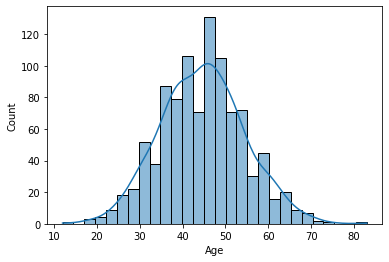

In [5]:
ax = sns.histplot(data, x = "Age", kde=True)
ax

Видим что то похожее на нормальное распределение.

In [6]:
p = scipy.stats.shapiro(data['Age'])# проведем тест Шапиро-Уилка на нормальность распределения
p

ShapiroResult(statistic=0.9978264570236206, pvalue=0.21738040447235107)

При доверительной вероятности > 5% и имеющимся pvalue = 21%, мы не сможем отвергнуть гипотезу о том, что распределение не нормальное, в таком случае, есть основания принять гипотезу о том, что распределение нормальное.

In [7]:
data.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


Посмотрим на характеристики данного распределения.

In [8]:
print("Медиана равна ", data['Age'].median())
print("Среднее равно ", data['Age'].mean())
print("Смещение равно ", data['Age'].skew())
mod = data['Age'].mode()[0]
mn = data['Age'].mean()
med = data['Age'].median()

Медиана равна  45.0
Среднее равно  44.674
Смещение равно  0.11059849403246863


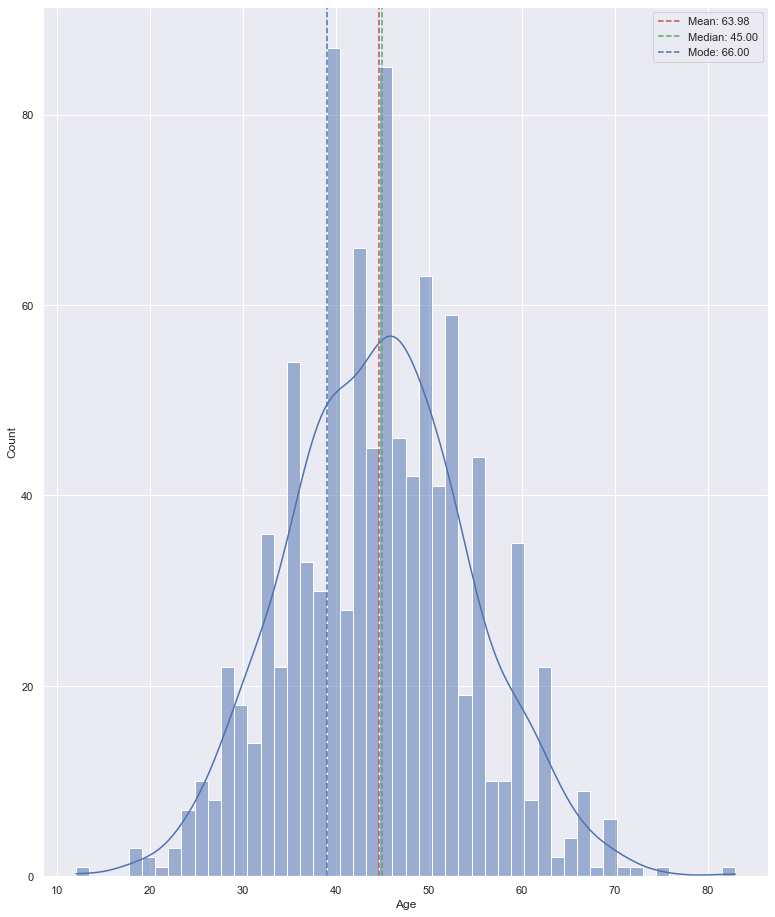

In [19]:
ax = sns.histplot(data, x = "Age", kde=True, bins = 50 )
ax.axvline(data['Age'].mean(), color='r', linestyle='--', label=f'Mean: {mn:.2f}')
ax.axvline(data['Age'].median(), color='g', linestyle='--', label=f'Median: {med:.2f}')
ax.axvline(data['Age'].mode()[0], color='b', linestyle='--', label=f'Mode: {mod:.2f}')
sns.set_theme(rc={'figure.figsize':(13,16)})
ax.legend()

Видим, что среднее очень близко к медиане, это говорит о том, что распределения несмещено. Посмотрим сдвиг медианы от среднего относительно к размаху

In [10]:
print("Смещение равно ", 100*abs(data['Age'].median() - data['Age'].mean())/(data['Age'].max() - data['Age'].min()), "%" )

Смещение равно  0.4591549295774655 %


# Равномерное распределение

In [11]:
dt = pd.read_csv('Desktop/crop_yield.csv')

<AxesSubplot:xlabel='Temperature_Celsius', ylabel='Count'>

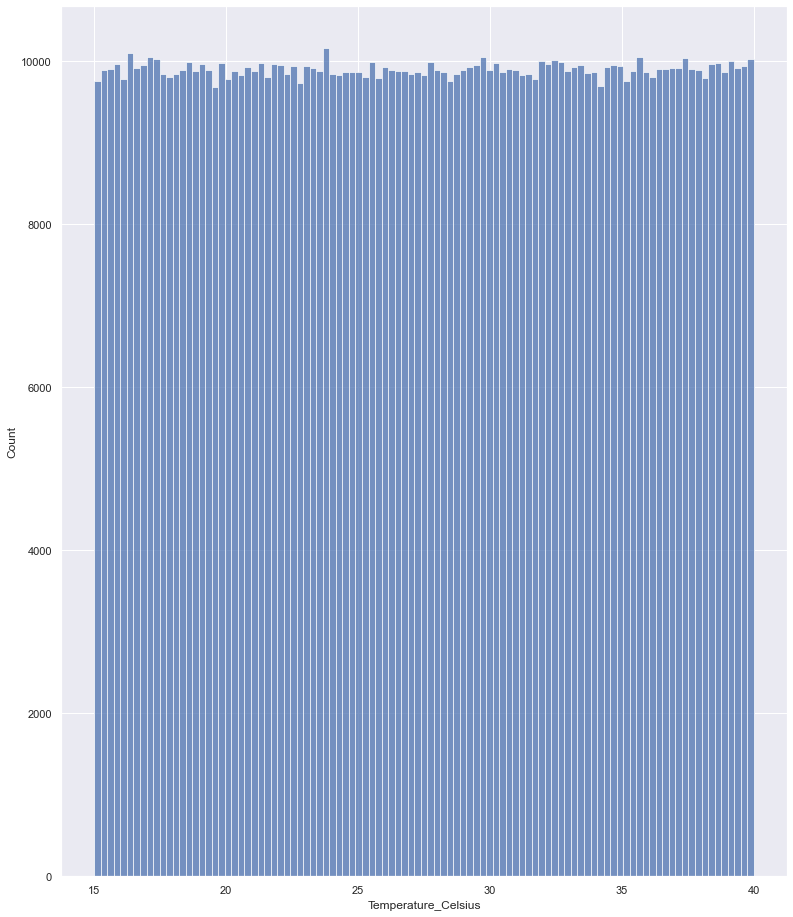

In [12]:
sns.histplot(dt, x = 'Temperature_Celsius')

In [13]:
dt['Temperature_Celsius'].describe()

count    1000000.000000
mean          27.504965
std            7.220608
min           15.000034
25%           21.254502
50%           27.507365
75%           33.753267
max           39.999997
Name: Temperature_Celsius, dtype: float64

Видим, что медиана почти равна среднему? что справедливо.

# Нормальное смещенное

In [14]:
dt1 = pd.read_csv("Desktop/remote_work_productivity.csv")

In [15]:
dt1

,Employee_ID,Employment_Type,Hours_Worked_Per_Week,Productivity_Score,Well_Being_Score
0,1,Remote,29,75,78
1,2,In-Office,45,49,47
2,3,Remote,34,74,89
3,4,Remote,25,81,84
4,5,Remote,50,70,74
...,...,...,...,...,...
995,996,Remote,33,88,82
996,997,Remote,33,88,73
997,998,In-Office,45,74,61
998,999,In-Office,57,50,52


Распределение со смещением

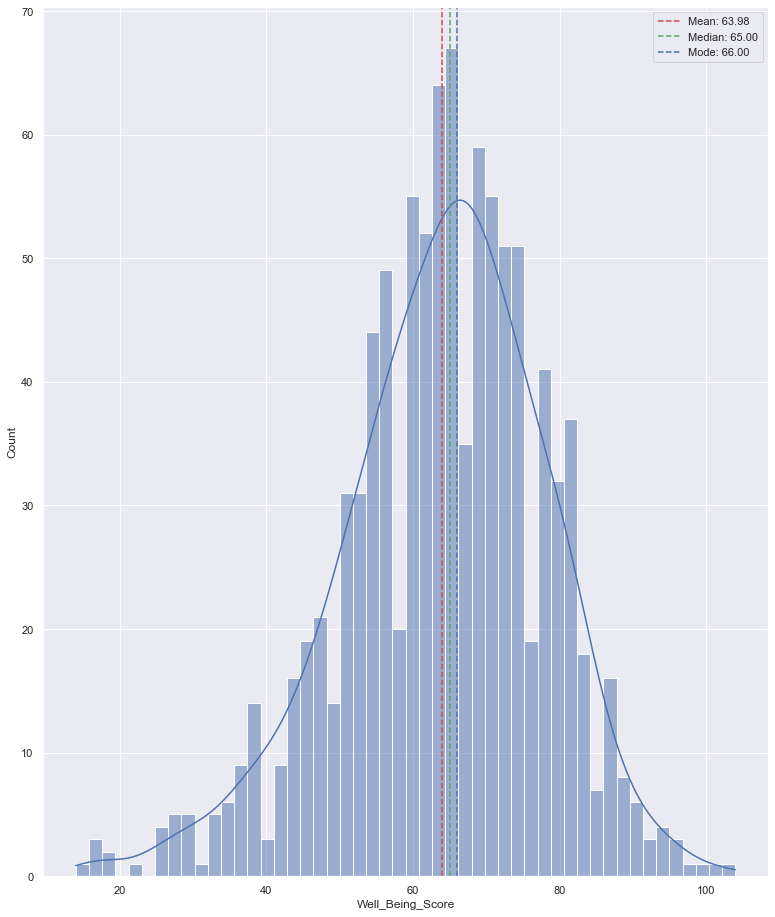

In [16]:
ax = sns.histplot(dt1,x = 'Well_Being_Score', kde = True, bins = 50 )
mn = dt1['Well_Being_Score'].mean()
md = dt1['Well_Being_Score'].median()
mod = dt1['Well_Being_Score'].mode()[0]
ax.axvline(dt1['Well_Being_Score'].mean(), color='r', linestyle='--', label=f'Mean: {mn:.2f}')
ax.axvline(dt1['Well_Being_Score'].median(), color='g', linestyle='--', label=f'Median: {md:.2f}')
ax.axvline(dt1['Well_Being_Score'].mode()[0], color='b', linestyle='--', label=f'Mode: {mod:.2f}')
sns.set_theme(rc={'figure.figsize':(13,16)})
ax.legend()

Сдвиг будет равен

In [17]:
data['Age'].skew()

0.11059849403246863

# Выбросы

<AxesSubplot:>

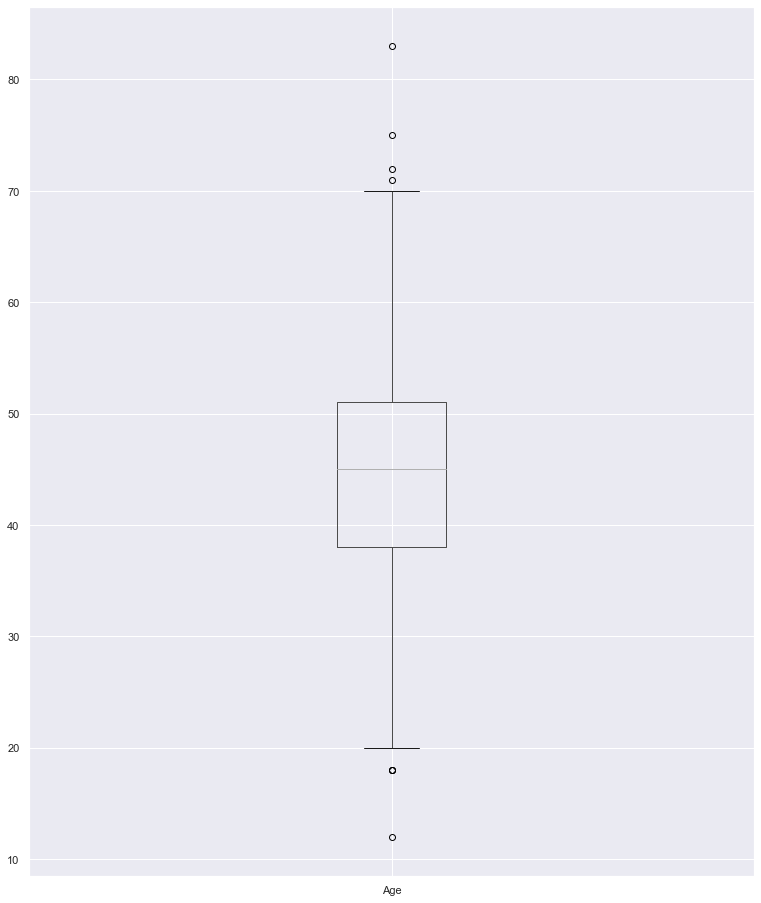

In [18]:
data.boxplot('Age')

Итак, мы видим выбросы в виде людей возраста за 70 лет и до 20. В данном случае, датафрей отражает обращения людей в маркетинговое агентство. Трудно представить причину, по которой люди за 70 лет будут обращаться в маркетинговое агентство. Аналогично с людьми до 20 лет. Полагаю, что в некоторых случаях операторы могет сделать ошибку при заполнении личного дела клиента и вбить не тот возраст, но это одна из гипотез. Возможно, люди случайно ошибались номером и звонили в маркетинговое агентство, но тогда не должно было существовать личного дела таких людей, так как звонок был случаен. Можно найти номера всех входящих звонков за последнее время и, если номера нет в базе клиентов, то либо человек ошибся номером (но операторы почему то указали его номер как полезный входящий и указали количество лет), либо это сорвавшийся клиент. Впрочем, нужно исходить из имеющихся данных.